Markdown macros

$\newcommand{\I}{\mathrm{i}} 
\newcommand{\E}{\mathrm{e}} 
\newcommand{\D}{\mathop{}\!\mathrm{d}}
\newcommand{\bra}[1]{\langle{#1}|}
\newcommand{\ket}[1]{|{#1}\rangle}
\newcommand{\braket}[1]{\langle{#1}\rangle}
\newcommand{\bm}[1]{\boldsymbol{#1}}$

# Imports

In [1]:
# numpy
import numpy as np

In [2]:
# matplotlib
import matplotlib
import matplotlib.pylab as plt

In [3]:
%matplotlib inline

In [4]:
# sympy
import sympy as sy
from sympy import symbols
from sympy import simplify, expand, collect, cancel, apart, trigsimp
from sympy import integrate, diff, series
sy.init_printing(use_unicode = True)

# Centre de masse

Pour un ensemble de $N$ particules de masse $m_n$ la défintion de $\bm R$ est:
$$\sum_{n = 1}^N m_n (\bm r_n - \bm R) = 0$$
où $\bm r_n$ sont les positions:
$$\bm R = \frac{1}{M}\sum_{n = 1}^N m_n \bm r_n, \quad M = \sum_{n = 1}^N m_n$$

Pour une distribution de masse continue de densité $\rho(\bm r)$, la formule équivalente est
$$ \bm R = \frac{1}{M}\int_V \D \bm r\, \bm r \rho(\bm r), \quad  M = \int_V \D \bm r\, \rho(\bm r)$$
avec $V$ le volume du corps.

# Aire et volume

L'élément $\D V$ d'un volume $V$ défini par les formules paramétriques
$$x = x(u, v, w), \; y = y(u, v, w), \; z = z(u, v, w)$$
est,
$$\D V = \D x \D y \D z= J \D u \D v \D w$$
avec le jacobien,
$$J = \begin{vmatrix} 
\frac{\partial x}{\partial u} & \frac{\partial x}{\partial v} & \frac{\partial x}{\partial w} \\ 
\frac{\partial y}{\partial u} & \frac{\partial y}{\partial v} & \frac{\partial y}{\partial w} \\
\frac{\partial z}{\partial u} & \frac{\partial z}{\partial v} & \frac{\partial z}{\partial w} 
\end{vmatrix}$$

On obtient l'élément d'aire $\D A$ d'une façon équivalente:
$$dA = \D x \D y = J \D u \D v, \quad J = \left| \frac{\partial \bm r}{\partial u} \times \frac{\partial \bm r}{\partial v} \right|$$
où $\bm r = (x(u,v), y(u,v), z(u,v))$.

### Surface, forme explicite

Soit $\bm r = (x, y, f(x,y)$ (les deux paramètres sont les coordonnées $(x,y)$):
$$A = \int_S \D x \D y\, \left| (1,0,f_x) \times (0,1,f_y) \right|  = \int_S \D x \D y\, \sqrt{1 + f_x^2 + f_y^2}$$ 


## Exemples: sphère, triangle, ...

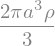

In [9]:
# Demi-sphère:
a = symbols("a", positive=True)
rho = symbols("rho", positive=True)
r, theta, phi = symbols("r, theta, phi", real=True)
M = rho*integrate(1, (phi,0,2*sy.pi*))*\
        integrate(sy.sin(theta), (theta, 0, sy.pi/2))*\
        integrate(r**2, (r,0,a))
M

In [18]:
R_x = (rho/M)*integrate(sy.sin(phi), (phi,0,2*sy.pi))*\
        integrate(sy.sin(theta)*sy.sin(theta), (theta, 0, sy.pi/2))*\
        integrate(r**3, (r,0,a))

R_y = (rho/M)*integrate(sy.cos(phi), (phi,0,2*sy.pi))*\
        integrate(sy.sin(theta)*sy.sin(theta), (theta, 0, sy.pi/2))*\
        integrate(r**3, (r,0,a))

R_z = (rho/M)*integrate(1, (phi,0,2*sy.pi))*\
        integrate(sy.cos(theta)*sy.sin(theta), (theta, 0, sy.pi/2))*\
        integrate(r**3, (r,0,a))

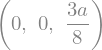

In [19]:
(R_x, R_y, R_z)

In [15]:
# Demi-sphère:
a = symbols("a", positive=True)
sigma = symbols("sigma", positive=True)
R, theta, phi = symbols("R, theta, phi", real=True)
M = sigma * R**2 * integrate(1, (phi,0,2*sy.pi))*\
        integrate(sy.sin(theta), (theta, 0, sy.pi/2))
M

In [16]:
R_z = (sigma * R**2/M) * integrate(1, (phi,0,2*sy.pi))*\
        integrate(R * sy.cos(theta)*sy.sin(theta), (theta, 0, sy.pi/2))

In [17]:
R_z

In [10]:
# Triangle
a, b = symbols("a, b", positive=True)
x, y = symbols("x, y", positive=True)
rho = symbols("rho", positive=True)
M = rho * integrate(integrate(1, (y, 0, (b/a)*x)), (x, 0, a))
M

In [11]:
R_x = (rho/M) * integrate(integrate(x, (y, 0, (b/a)*x)), (x, 0, a))
R_y = (rho/M) * integrate(integrate(y, (y, 0, (b/a)*x)), (x, 0, a))

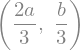

In [12]:
R_x, R_y

# Moment d'inertie

On consirère un corps de densité $\rho = \rho(\bm r$, en général non homogène, de volume $V$. Le moment d'inertie est construit sur les moments d'ordre deux de la densité:
$$I_{ij} = \int_V \D \bm r \, (r^2 \delta_{i,j} - x_i x_j) \rho(\bm r)$$
avec $i,j = 1, 2, 3$ correspondant aux coordonnées $\bm r = (x, y, z)$.

On peut représenter le moment d'inertie par une matrice:
$$I = \int_V \D \bm r \, \rho \begin{pmatrix} y^2 + z^2 & -xy & -xz \\  -yx & x^2 + z^2 & -yz \\  -zx & -zy & x^2 + y^2 \end{pmatrix}$$

Un transformation de coordonnées permet de rendre la matrice diagonale. Les éléments de la diagonale:
$$I = \mathrm{diag}(I_x, I_y, I_z)$$
sont les moments "principaux" d'inertie.

## Choix des coordonnées

L'avantage d'écrire $I$ comme un tenseur c'est qu'on peut calculer ses élément dans n'importe quelle base. Cependant le calcul de $I_{ij}$ est grandement simplifié si on choisi un système de coordonnées qui respecte les symétries de l'objet.

Si on note $I^G$ le tenseur d'inertie calculé sur le centre de masse, le tenseur $I$ calculé sur un point $\bm d = (d_x, d_y, d_z)$, avec $d$ la distance du nouvel origine au centre de masse, on a la formule de changement de coordonnées:
$$I_{ij} = I^G_{ij} + M(d^2 \delta_{ij} - d_id_j)$$

Dans le cas d'une rotation $R_{\bm n}(\varphi)$ du solide autour de centre de masse, la matrice $I^G$ change selon la formule:
$$I = R_{\bm n}(\varphi) I^G R_{\bm n}(\varphi)^T$$

Considérons un exemple. Un carré de côté $a$, avec l'origine en $(0,0)$ et en $(a/2,0)$:

In [6]:
a, x, y = sy.symbols("a, x, y", real=True)
M = sy.symbols("M", real=True)
def I_carre_0(f):
    return sy.integrate(sy.integrate(f, (y, 0, a)), (x, 0, a))

A = I_carre_0(1)
rho = M/A      
A

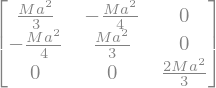

In [7]:
# ORIGINE(0,0)
I_xx = rho * I_carre_0(y**2)                
I_yy = rho * I_carre_0(x**2)           
I_xy = rho * I_carre_0(-x*y)
I_zz = I_xx + I_yy
I_0 = sy.Matrix([[I_xx, I_xy, 0], [I_xy, I_yy, 0], [0, 0, I_zz]])
I_0

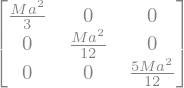

In [9]:
# ORIGINE (a/2,0)
def I_carre_1(f):
    return sy.integrate(sy.integrate(f, (y, 0, a)), (x, -a/2, a/2)) 

I_xx = rho * I_carre_1(y**2)                
I_yy = rho * I_carre_1(x**2)           
I_xy = rho * I_carre_1(-x*y)
I_zz = I_xx + I_yy
I_1 = sy.Matrix([[I_xx, I_xy, 0], [I_xy, I_yy, 0], [0, 0, I_zz]])
I_1

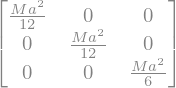

In [10]:
# Centre de masse (a/2,a/2)
def I_carre_G(f):
    return sy.integrate(sy.integrate(f, (y, -a/2, a/2)), (x, -a/2, a/2))

I_xx = rho * I_carre_G(y**2)                
I_yy = rho * I_carre_G(x**2)           
I_xy = rho * I_carre_G(-x*y)
I_zz = I_xx + I_yy
I_G = sy.Matrix([[I_xx, I_xy, 0], [I_xy, I_yy, 0], [0, 0, I_zz]])
I_G

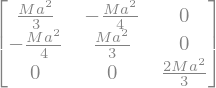

In [11]:
# I_0: on a d = (-a/2,-a/2)
I_d0 = sy.Matrix([[M*a**2/4, -M*a**2/4 , 0], [-M*a**2/4, M*a**2/4, 0], [0, 0,  M*a**2/2]])
I_G + I_d0

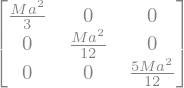

In [12]:
# I_1: on a d = (0,-a/2)
I_d1 = sy.Matrix([[M*a**2/4, 0 , 0], [0, 0, 0], [0, 0,  M*a**2/4]])
I_G + I_d1

## Axes principaux

Comme le tenseur d'inertie est symétrique, on peut toujours diagonaliser sa matrice, et donc l'ecrire comme
$$I = \mathrm{diag}(I_x, I_y, I_z)$$
Les trois valeurs de la diagonale sont les racines du polynôme caractéristique:
$$P(\lambda) = \det\left(I - \lambda 1_3\right) = 0$$
($1_3$ est la matrice identité de dimension 3); les vecteurs propres de la transformation sont les axes principaux du corps. Ils coincident avec les axes de symétrie du corps, si la densité est uniforme.

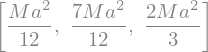

In [98]:
# Carre O=(0,0)
l = sy.symbols("lambda", real=True)
p = sy.det(I_0 - l*sy.eye(3))
sy.solve(sy.Eq(p,0),l)

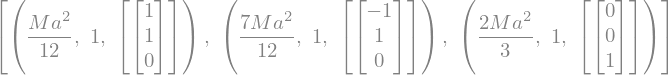

In [101]:
I_0.eigenvects()

on voit qu'une rotation de 45 degrés permet de diagonaliser la matrice (un axe passant par le centre du carrée).

# Cinématique du solide

## Vitesse angulaire

Dans un repère fixe $(X,Y,Z)$ un point $\bm X$ du solide $\mathcal{V}$ varie selon le mouvement du centre de masse $\bm R$ et de sa propre rotation d'angle $\varphi$ et d'axe $\bm n$, $\D \bm \varphi = \bm n \D \varphi$:
$$\D \bm X = \D \bm R + \D \bm \varphi \times \bm r$$
où $\bm r$ est un point appartenant à $\mathcal{V}$, mesuré dans le repère $(x,y,z)$ d'origine $O$ (le centre de masse) fixé au solide: $\bm X = \bm R + \bm r$ à chaque instant $t$.

Les coordonnées $(X,Y,Z)$ sont fixes, tandis que les coordonnées $(x,y,z)$ évoluent dans le temps:
$$\frac{\D \bm X}{\D t} = \bm v, \; \frac{\D \bm R}{\D t} = \bm V, \; \frac{\D \bm a}{\D t} = \bm \Omega$$
On a donc la transformation de la vitesse entre le repère fixe $\bm v$ et le mouvement du corps:
$$\bm v = \bm V + \bm \Omega \times \bm r$$
Le vecteur $\bm r$ ne dépend pas du temps puisqu'il est un point d'un corps solide (indéformable).

Si l'origine de coordonnées du corps n'est pas sur son centre de masse, mais il est déplacé de $\bm d$, on a la transformation suivante:
$$\bm v = \bm V + \bm \Omega \times \bm d + \bm \Omega \times \bm r'$$
avec $\bm r = \bm r' + \bm d$,
$$\bm V' = \bm V + \bm \Omega \times \bm d, \; \bm \Omega' = \bm \Omega$$
le centre de masse tourne, mais la vitesse angulaire du corps est invariante.

## Énergie cinétique

Elle est donnée par la formule habituelle
$$T = \frac{1}{2} \sum_n m_n \bm v_n^2$$
En y substituant l'expression de $\bm v$ on obtient:
$$T = \frac{1}{2} \sum_n m_n \bm V^2 + \sum_n m_n \bm \Omega \times \bm r_n + \frac{1}{2} \sum_n m_n \left( \Omega \times \bm r_n \right)^2$$
On note que le terme du milieu est nul, par définition du centre de masse, on a donc:
$$T = \frac{M V^2}{2} + \frac{1}{2} \sum_n m_n \left( \Omega \times \bm r_n \right)^2=  \frac{M V^2}{2} +  \frac{1}{2} \sum_n m_n (\Omega_l^2 x_{nl}^2 - \Omega_i x_{ni} \Omega_j x_{nj})$$
où nous avons introduit la notation en coordonnées (avec la convention que l'on fait la somme sur les indices répétés). En notant que $\Omega_l^2 x_l^2 = \Omega_i \Omega_j \delta_{ij} x_l^2$, on peut écrire:
$$T = \frac{M V^2}{2} + \frac{1}{2} \sum_n m_n (x_{nl}^2 \delta_{ij} - x_{ni} x_{nj}) \Omega_i \Omega_j$$
On trouve donc
$$T = \frac{M V^2}{2} + \frac{1}{2} I_{ij} \Omega_i \Omega_j$$
avec 
$$I_{ij} =  \sum_n m_n (x_{nl}^2 \delta_{ij} - x_{ni} x_{nj})$$
le tenseur d'inertie.

## Vitesse angulaire en fonction d'angles d'Euler

Dans le repère du centre de masse $(x,y,z)$:
\begin{align*}
\Omega_x &= \dot{\psi} \sin \theta \sin \varphi + \dot{\theta} \cos \varphi \\
\Omega_y &= \dot{\psi} \sin \theta \cos \varphi - \dot{\theta} \sin \varphi \\
\Omega_z &= \dot{\psi} \cos \theta + \dot{\varphi}
\end{align*}

In [5]:
phi, theta, psi = symbols("phi, theta, psi", real=True)

def R_x(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[1,  0, 0],
                  [0, c, -s],
                  [0, s,  c]])
def R_y(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[ c, 0, s],
                  [ 0, 1, 0],
                  [-s, 0, c]])

def R_z(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[c, -s, 0],
                  [s,  c, 0],
                  [0,  0, 1]])

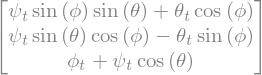

In [11]:
# d phi/d t est dirigé selon ez(mobile)
# d theta/d t est dirigé selon la ligne nodale eN
# d psi/d t est dirigé selon eZ (fixe)
psi_t, theta_t, phi_t = sy.symbols("psi_t, theta_t, phi_t", real=True)
#
ez = sy.Matrix([0,0,1])
ex = sy.Matrix([1,0,0])

eZ = R_z(-phi)*R_x(-theta)*ez
eN = R_z(-phi)*R_x(-theta)*ex
Omega = phi_t*ez + theta_t*eN + psi_t*eZ
Omega

## Équation d'Euler

La variation d'un vector quelconque $\bm A$ se décompose dans une partie de variation intrinsèque (dans le repère mobile) qu'on note avec une prime, et une autre partie due à la rotation de vitesse angulaire $\bm \Omega$:
$$\frac{\D \bm A}{\D t} = \frac{\D' \bm A}{\D t} + \Omega \times \bm A$$
On peut aussi noter explicitement les repères:
$$\left. \frac{\D \bm A}{\D t} \right|_{(X,Y,Z)} = \left. \frac{\D \bm A}{\D t} \right|_{(x,y,x)} + \left. \Omega \times \bm A \right|_{(x,y,z)}$$

## Moment cinétique

Pour un ensemble de points matériels le moment cinétique (ou moment angulaire) $\bm L$:
$$\bm L = \sum_n m_n \bm r_n \times \bm v_n$$
Un changement du centre de coordonnées par une translation $\bm d$, $\bm r = \bm r' + \bm d$ transforme le moment 
$$\bm L = \sum_n (\bm r'_n \times \bm p_n + \bm d \times \bm p_n) = \bm L' + \bm d \times \bm P$$
Si deux systèmes ont une vitesse relative $\bm V$: $\bm v_n = \bm v'_n + \bm V$, le moment cinétique change selon la loi:
$$\bm L = \bm L' + M \bm R \times V$$

### Solide

La généralisation à un corps solide consiste à remplacer la vitesse des particules par la vitesse angulaire du solide $\bm \Omega \times \bm r$:
$$L_i = I_{ij} \Omega_j$$
(toujours on somme sur les indices répétés).
Notez:
$$\bm r \times (\bm \Omega \times \bm r) = \bm \Omega r^2 - \bm r (\Omega \cdot \bm r)$$
ce qui s'écrit comme le produit du tenseur d'inertie par le vecteur de vitesse angulaire. 

Il convient de faire un changement de coordonnées pour exprimer le tenseur d'inertie selon ses axes principales:
$$ L_x = I_x \Omega_x,\; L_y = I_y \Omega_y, \; L_z = I_z \Omega_z$$

### Variation de $\bm L$

La variation "instantanée" du moment $\bm L$ est donnée par la formule générale, applicable à tout vecteur:
$$\left. \frac{\D \bm L}{\D t} \right|_{(X,Y,Z)} = \left. \frac{\D \bm L}{\D t} \right|_{(x,y,x)} + \left. \Omega \times \bm L \right|_{(x,y,z)}$$
où $(X,Y,Z)$ est le repère fixe, et $(x,y,z)$ le repére fixé au solide, mobile par rapport à $(X,Y,Z)$.

Dans le cas où le tenseur $I$ est diagonal, on a
\begin{align*}
\dot{L}_x &= I_x \frac{\D \Omega_x}{\D t} + (I_z-I_y)\Omega_y \Omega_z \\
\dot{L}_y &= I_y \frac{\D \Omega_y}{\D t} + (I_z-I_x)\Omega_x \Omega_z \\
\dot{L}_z &= I_z \frac{\D \Omega_z}{\D t} + (I_y-I_x)\Omega_x \Omega_y \\
\end{align*}

# Triangle

[Text(0, 0.0, '$0$'), Text(0, 1.5, '$h$')]

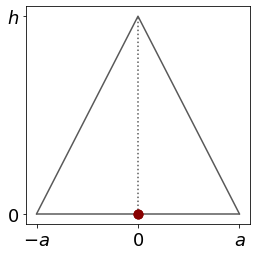

In [17]:
N = 65
x = np.linspace(-1,1,N)
y = -1.5*np.abs(x) + 1.5
fig, ax = plt.subplots(figsize = (4,4))
ax.plot(x, y, color = '0.35')
ax.plot([-1,1], [0,0], color = '0.35')
ax.plot([0,0], [0,1.5], ":", color = '0.35')
ax.plot([0,0], [0,0], ".", color = '#800', ms = 18)
ax.set_xticks([-1, 0, 1])
ax.set_xticklabels(["$-a$", "$0$", "$a$"], fontsize = 18)
ax.set_yticks([0, 1.5])
ax.set_yticklabels(["$0$", "$h$"], fontsize = 18)

On a un triangle $y=-(b/a) |x| + h$, et on veut calculer son moment d'inertie (en prennant $(0,0)$ comme centre de coordonnées associées au corps).

In [18]:
x, y = sy.symbols("x, y", real=True)
a, h = sy.symbols("a h", real=True)
rho, M = sy.symbols("rho M", real=True)

In [19]:
# intégrale double sur le triangle
def I_triangle(f):
    return sy.integrate(sy.integrate(f, (y, 0,  (h/a)*x + h)), (x, -a, 0)) +\
           sy.integrate(sy.integrate(f, (y, 0, -(h/a)*x + h)), (x, 0, a))

In [20]:
# aire du triangle A, on a M = rho A
A = I_triangle(1)
A

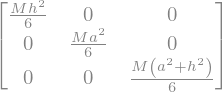

In [21]:
# inertie
# I_xx, I_yy, I_zz = I_xx + I_yy, I_xy = I_yx = 0
I_xx = (M/A) * I_triangle(y**2)
I_yy = (M/A) * I_triangle(x**2)
I_xy = (M/A) * I_triangle(x*y)
I_zz = sy.simplify(I_xx + I_yy)

I = sy.Matrix([[I_xx, I_xy, 0], [I_xy, I_yy, 0], [0, 0, I_zz]])
I

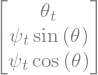

In [32]:
# vitesse angulaire (xyz)
w = Omega.subs([(phi,0), (phi_t,0)])
w_x, w_y, w_z = w[0], w[1], w[2]
w

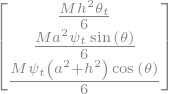

In [33]:
# Angular momentum (xyz)
L_xyz = sy.Matrix([I_xx * w_x, I_yy * w_y, I_zz * w_z])
L_xyz